##  1. Motivation: 
We want to understand how the coefficient $\rho_{j}^{2} = \frac{g_{j}^2}{\|v_{j}\|^2} = \frac{\|w_{j}\|^{2}}{\|v_{j}\|^{2}}$ in weight normalization change in each layer as traning progresses. We look into how $g_{j}^2$,$ \|v_{j}\|^2$, and   $\rho_{j}$ change along the way. 

#### Recall the relationship of reparametrized  model and original model:


IF this equation is not showing up. Check image: Equation10 

$ \begin{bmatrix} \delta w_{0j}\\ \delta \mathbf{w}_{j} \end{bmatrix} =\begin{bmatrix} 1 & \mathbf{0} \\ \mathbf{0}^{T} & \bigg[\frac{\mathbf{w}_{j}\mathbf{w}_{j}^{T}}{\|\mathbf{w}_{j}\|^{2}}+\frac{g^{2}}{\|\mathbf{v}_{j}\|^{2}}\bigg(\mathbf{I}-\frac{\mathbf{w}_{j}\mathbf{w}_{j}^{T}}{\|\mathbf{w}_{j}\|^{2}}\bigg)\bigg] \end{bmatrix} \begin{bmatrix} \textstyle \big<\frac{\partial E}{\partial w_{0j}}\big>\\ \textstyle \big<\frac{\partial E}{\partial \mathbf{w}_{j}}\big> \end{bmatrix} $

## 2.  Experiment details:
We did experiment on dataset CIFAR-10 (50,000 trainning set, 10,000 test) and used the standard setup in LeNet (shown as below), i.e., 

- SGD with momuemtom =0.9 and batch-size = 128 images for training ( batch-size = 100 images for testing). 

- Learning rate lr = 0.1 at the first 77 epochs, lr = 0.01 at epochs 78 - 119 , lr = 0.001 at epochs 120 - 180.  


#### LeNet:

  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  
  (fc1): Linear (400 -> 120)
  
  (fc2): Linear (120 -> 84)
  
  (fc3): Linear (84 -> 10)


### The loss and accuracy in trainning and testing set. 

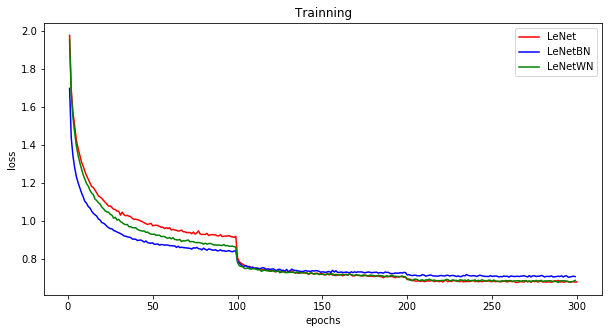

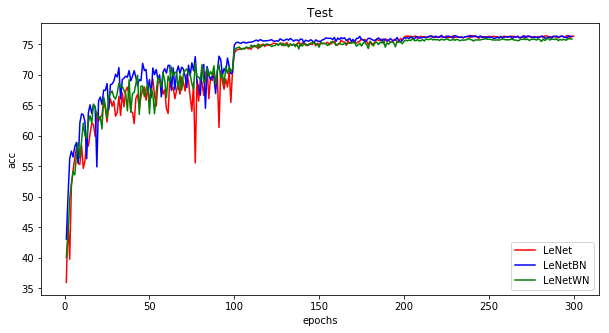

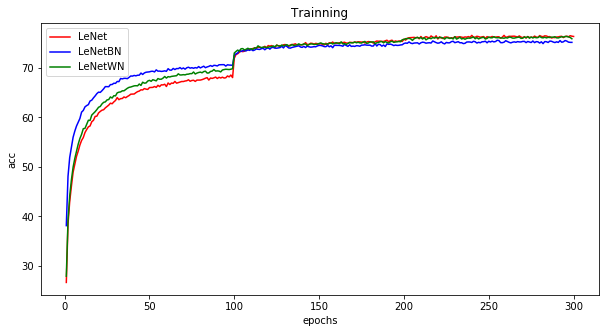

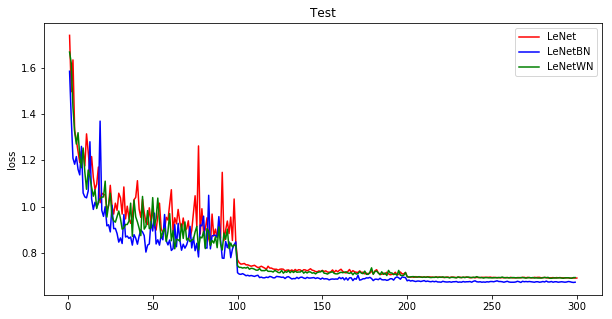

# 3. Overviews
In the first three cells (each cell has 3 plots), we give you the overviews on the dynamics of   $\rho_{j}$, $g_{j}^2$, and $\|v_{j}\|^2$.  These cells  [31], [32], [33]  tells about the dynamics of  $\rho_{j}$, $g_{j}^2$, and $\|v_{j}\|^2$ for three learning rates:
-  lr = 0.1 for cell [31]
-  lr = 0.01 for cell [32]
-  lr = 0.001 for cell [33] 

#############################################################################################
#### Undertand the three plots in each cell . Note first that ALL 3 plots share the same X-axis and Y-axis: 
- Y-axis is the Epoch. 
- X-axis is the layer in LeNet. Number 0-5 are the first connolutional layers;  Number 6-21 are the second connolutional layers;   Number 22-141 are the first fully connected layers;  Number 142-225 are the second fully connceted layers (we ommitted dynamcis at the last fully connceted layers).
- Z-axis is the value in  $\rho_{j}$ (Left), $g_{j}$ (Middle), and $\|v_{j}\|$ (Right) respectively.


### 3.1  Observation: 
#### -- At Learning rate 0.1,  $g_{j}$ (Middle) and $\|v_{j}\|$ (Right) move very similarly (increase most of the cases) for all layers (connvolution and fully connected layers).  While in convolution layers, $\rho_{j}$ varies (some increase, some decrease and the rest fluctuate),  $\rho_{j}$ decrese in fully connected layers!  The reason could be $\|v_{j}\|$  in fully connected layers ($v_{j}\in R^{120}$ in first FC layers and $v_{j}\in R^{80}$ in second FC layers) are much larger than that in convolutional layers ($v_{j}\in R^{5\times 5}$ in first and second Conv layers ).  

#### -- At Learning rates 0.01 and 0.001, in most of the cases,  $g_{j}$ (Middle) flatten with little upward trends (most of the cases)  and $\|v_{j}\|$ (Right)  decrease in all layers. As consequence,   $g_{j}$ increseas.


<IPython.core.display.Javascript object>


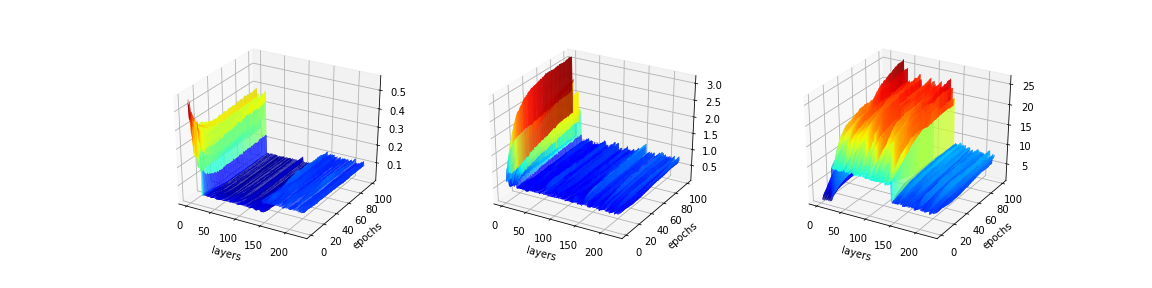

In [6]:
plot3d(filename[0])

<IPython.core.display.Javascript object>


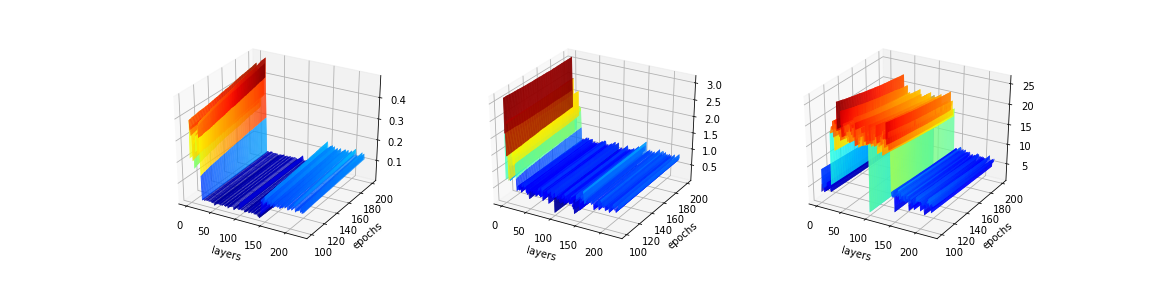

In [7]:
plot3d(filename[1])

<IPython.core.display.Javascript object>


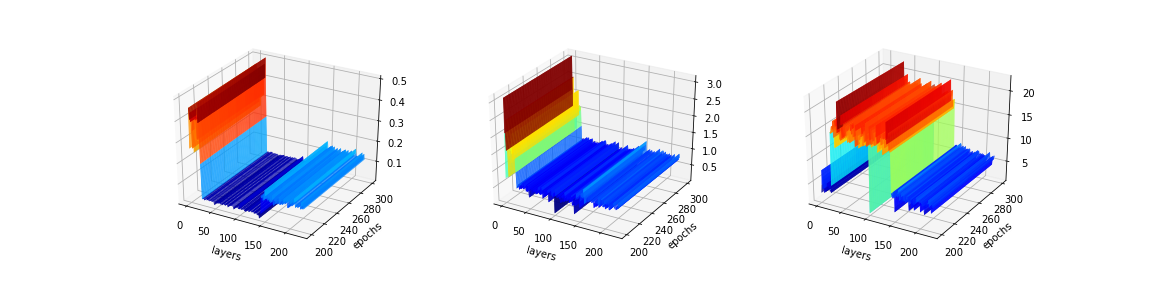

In [8]:
plot3d(filename[2])

## 4. Details in  Layers 

## 4.1 First Convolution Layer (6 neurons: Number 0 - 5)
Note that for the convenience of notation we omitted the subscript  $._{j}$

###    4.1.1 Learning rate = 0.1

- For Learning rate = 0.1, the changes of $g$ and $w$ are fairly similar: the values of $g$ and $\| v \|$ are growing steadily at the first 20 epochs, then start to slow down between epchs 20 -76. Some $g$ continue increase while some $g$ and $\|v\|$  head downward. Becasue their rates of growing  are various,  the ratio $\frac{g}{\|v\|}$  are fairly volatile:  increase for some filters,  decrease or flactuate at certain level for others.


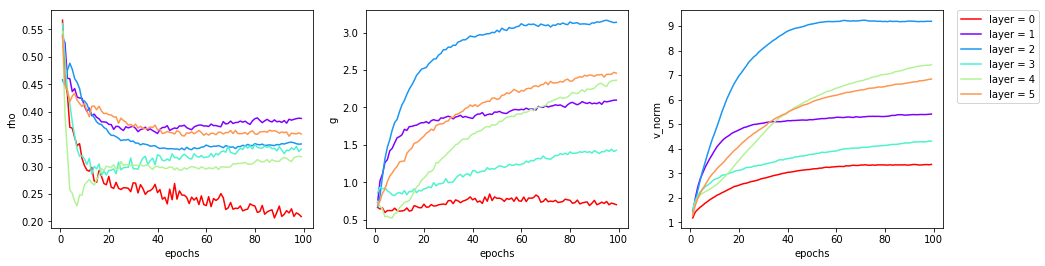

In [9]:
%matplotlib inline
plot2d(filename[0],layers_start =0,layers_end = 6,total_layers = 6)

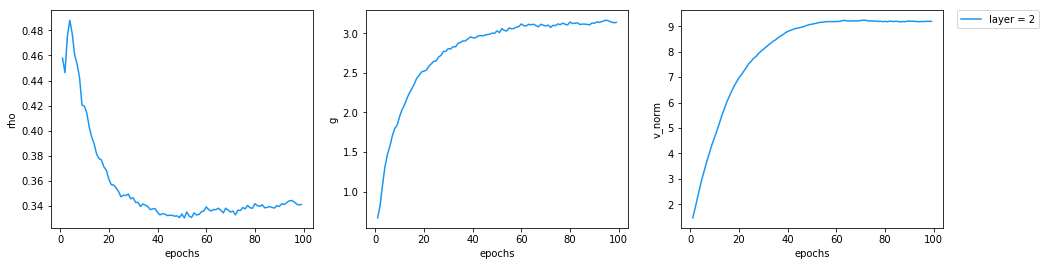

In [10]:
plot2d(filename[0],layers_start =2,layers_end = 3)

###   4.1.2   Learning rate = 0.01
- For Learning rate = 0.01, the values of $g$ flaten at certain level (some are actually continue growing FILTER 5) while $\| v \|$ are ALL decreasing. In results, the ratio $\frac{g}{\|v\|}$  shows increase trends.


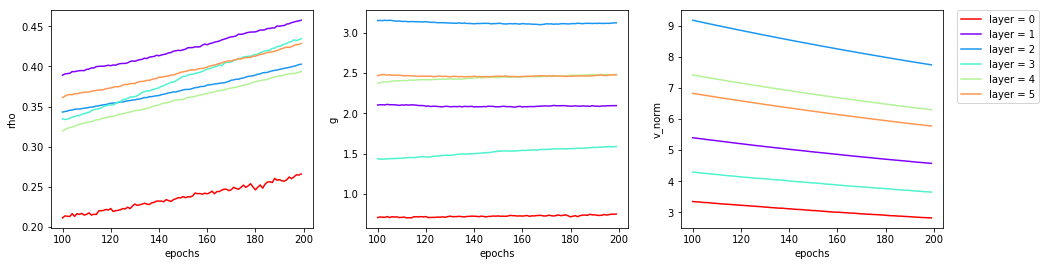

In [11]:
plot2d(filename[1],layers_start =0,layers_end = 6)

###    4.1.3  Learning rate = 0.001


- For Learning rate = 0.001, $\frac{g}{\|v\|}$  increase, very similar to learning rate = 0.01. 


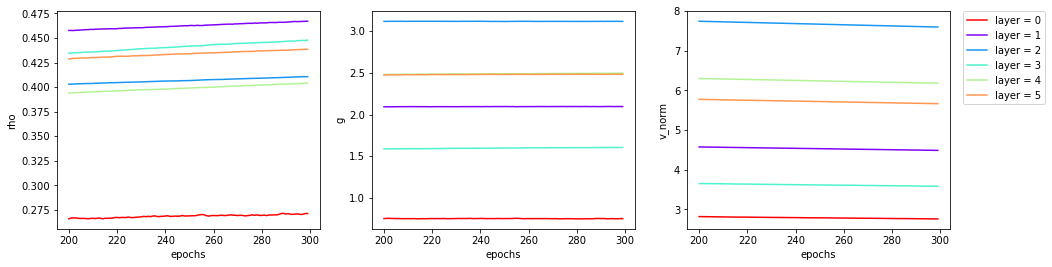

In [12]:
plot2d(filename[2],layers_start =0,layers_end = 6)

## 4.2 Second Convolution Layer (16 neurons: Number 6 - 21)
The dynamics of $\rho, g$ and $\|v\|$ are very similar to first convolutional layers.

### 4.2.1     Learning rate = 0.1

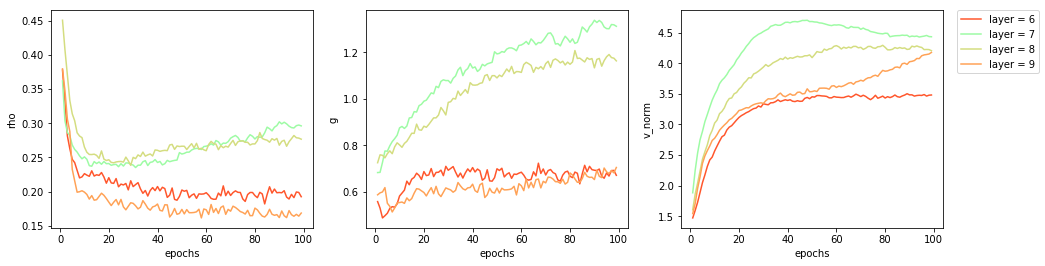

In [13]:
#neurons 6-9
plot2d(filename[0],layers_start =6,layers_end = 10,total_layers = 10)

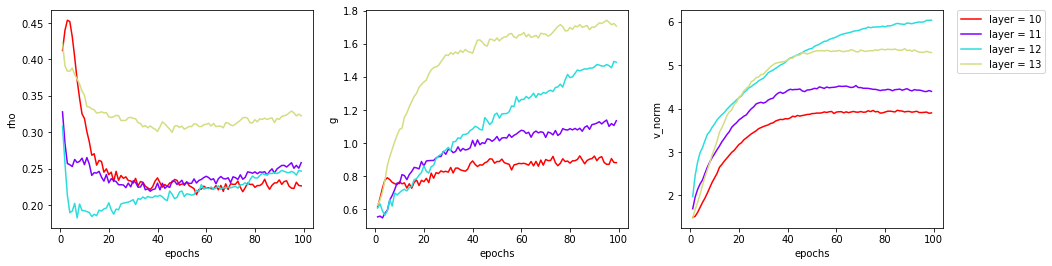

In [14]:
#neurons 10-13
plot2d(filename[0],layers_start =10,layers_end = 14,total_layers = 4)

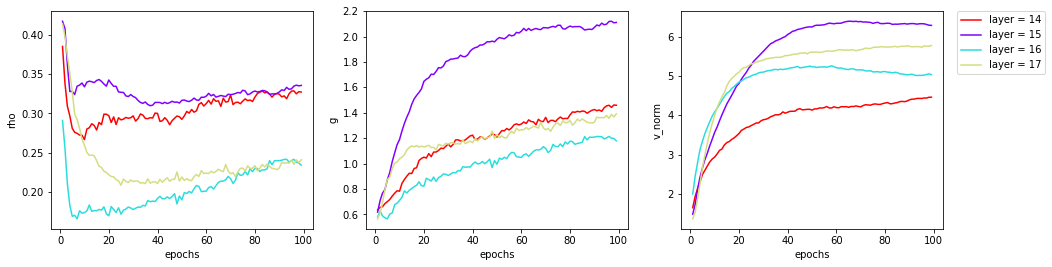

In [15]:
#neurons 14-17
plot2d(filename[0],layers_start =14,layers_end = 18,total_layers = 4)

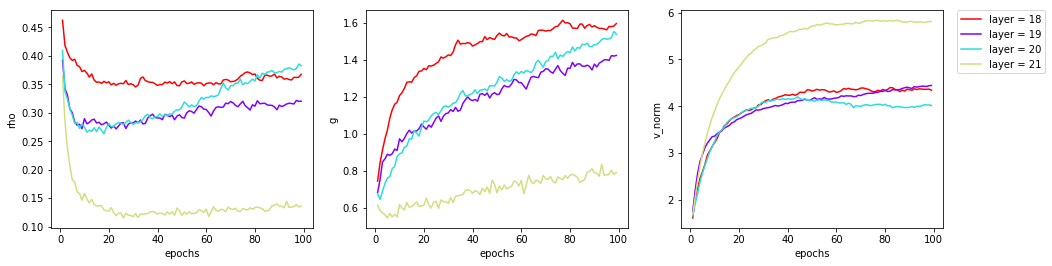

In [16]:
#neurons 18-21
plot2d(filename[0],layers_start =18,layers_end = 22,total_layers = 4)

### 4.2.2    Learning rate = 0.01

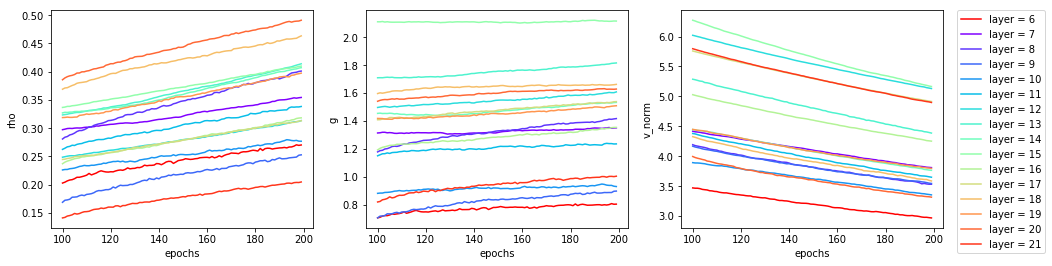

In [17]:
plot2d(filename[1],layers_start =6,layers_end = 22,total_layers = 16)

### 4.2.3   Learning rate = 0.001

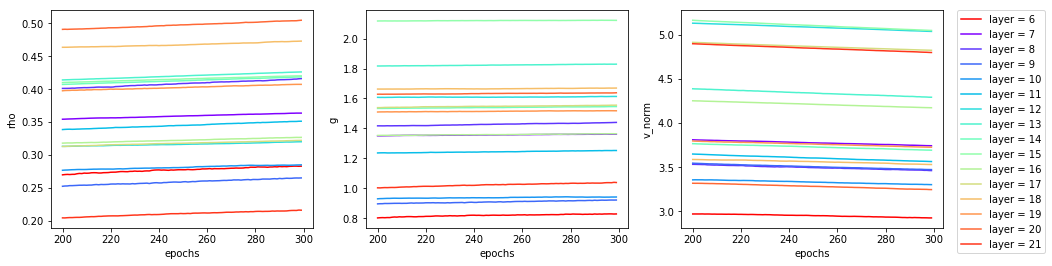

In [18]:
plot2d(filename[2],layers_start =6,layers_end = 22,total_layers = 16)

## 4.3 First FC  Layer (120 neurons: Number 22 to 141)
###  In most of the cases,
#### --  $\rho$ decreases at learning rate 0.1 during the first 77 epochs  and  then increses at learning rates 0.01 and 0.001 after epochs 77 

#### --  $\|v_{j}\|$ increases dramatically  during the first 15 epochs  and  then stay flat (at learning rate 0.1). After lowering the learning rates to 0.01 at epoch 78 and then 0.001 at epoch 120, $\|v_{j}\|$ decrease. 

####  --  $\|g_{j}\|$ move  similarily to   $\|v_{j}\|$ at learning rate 0.1,  but with much higher volatility: upward trends during the first 15 epochs and stay flat. After lowering the learning rates to 0.01 at epoch 78 and then 0.001 at epoch 120, $\|v_{j}\|$, its dynamics various but with much smaller changes (compare to $\|v_{j}\|$ ): some increase, some decrease and some stay at certain level.

### 4.3.1    Learning rate = 0.1

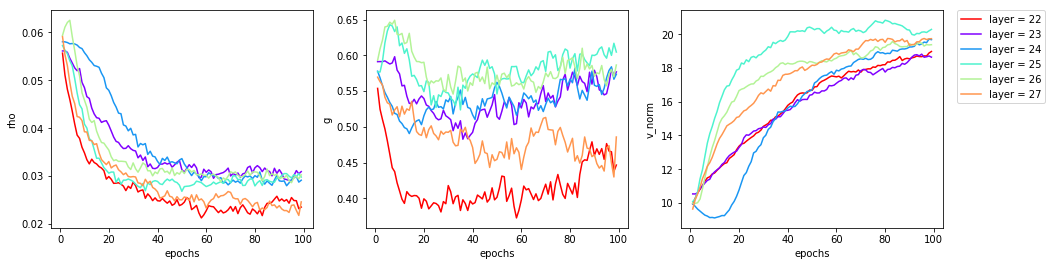

In [19]:
plot2d(filename[0],layers_start = 22,layers_end =28 ,total_layers = 6)

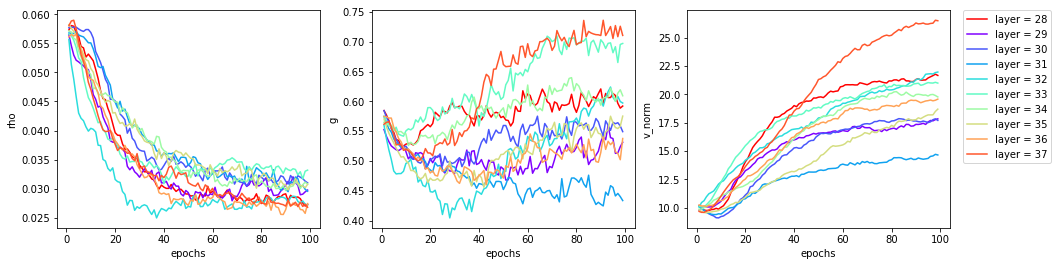

In [20]:
plot2d(filename[0],layers_start = 28,layers_end = 38,total_layers = 10)

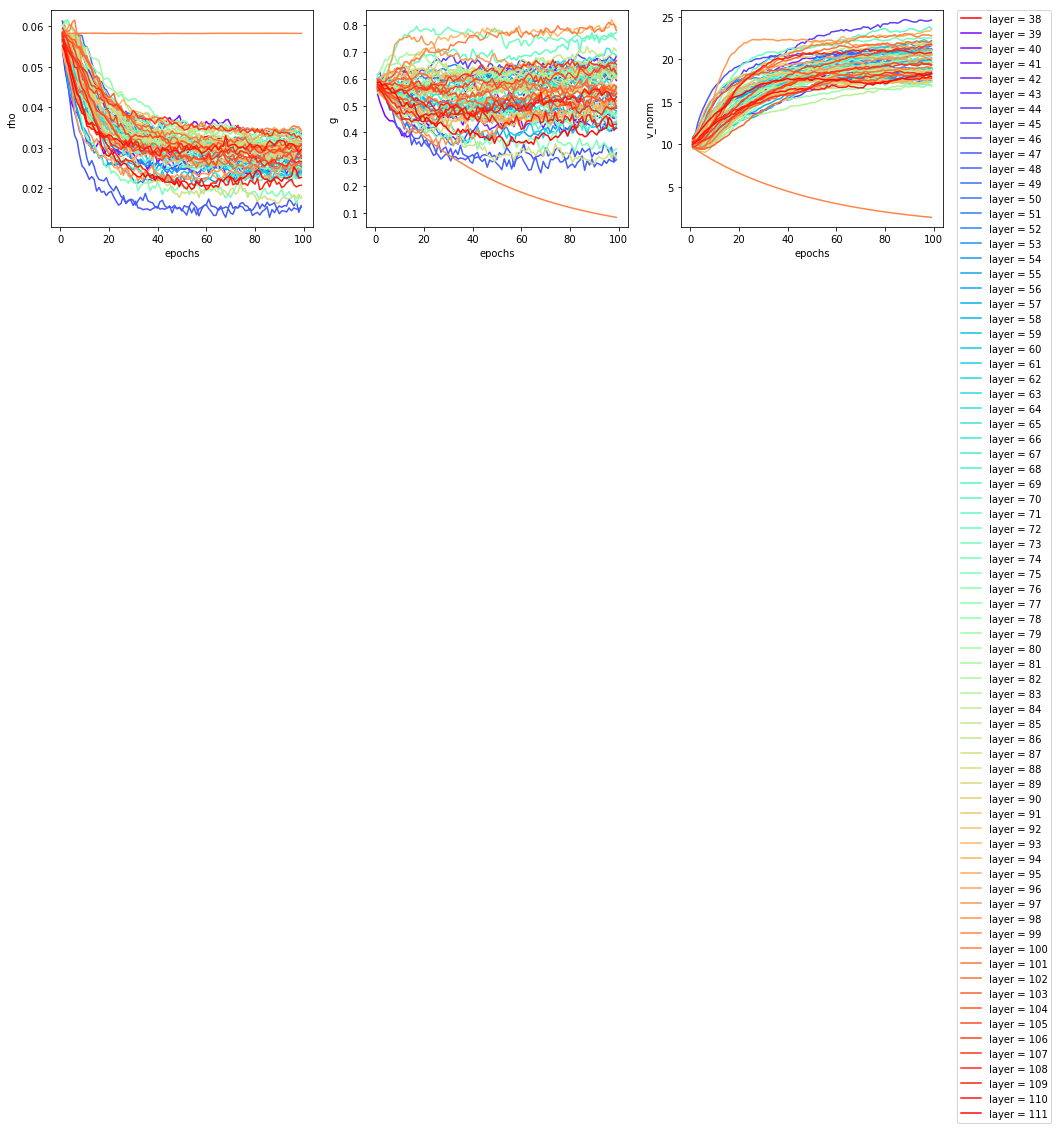

In [21]:
plot2d(filename[0],layers_start = 38,layers_end =120+22-30,total_layers = 120+22-38-30)

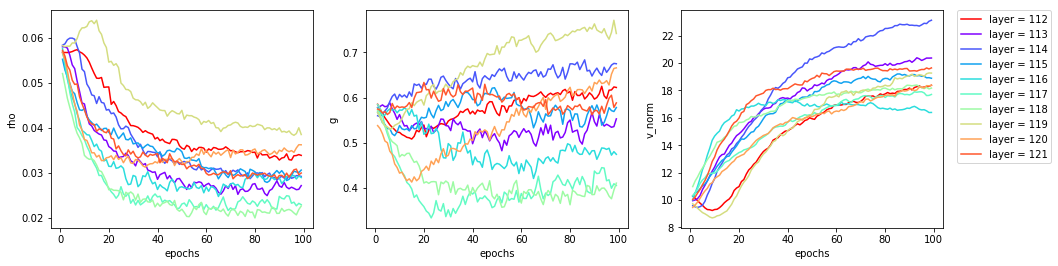

In [22]:
plot2d(filename[0],layers_start = 120+22-30,layers_end =120+22-20,total_layers =10)

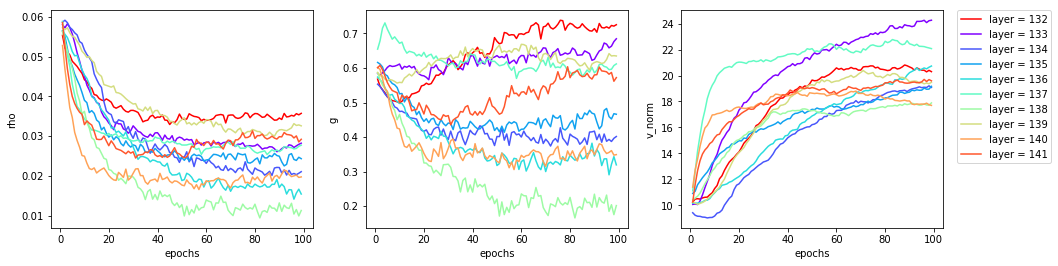

In [23]:
plot2d(filename[0],layers_start = 120+22-10,layers_end =120+22,total_layers =10)

### 4.3.2     Learning rate = 0.01

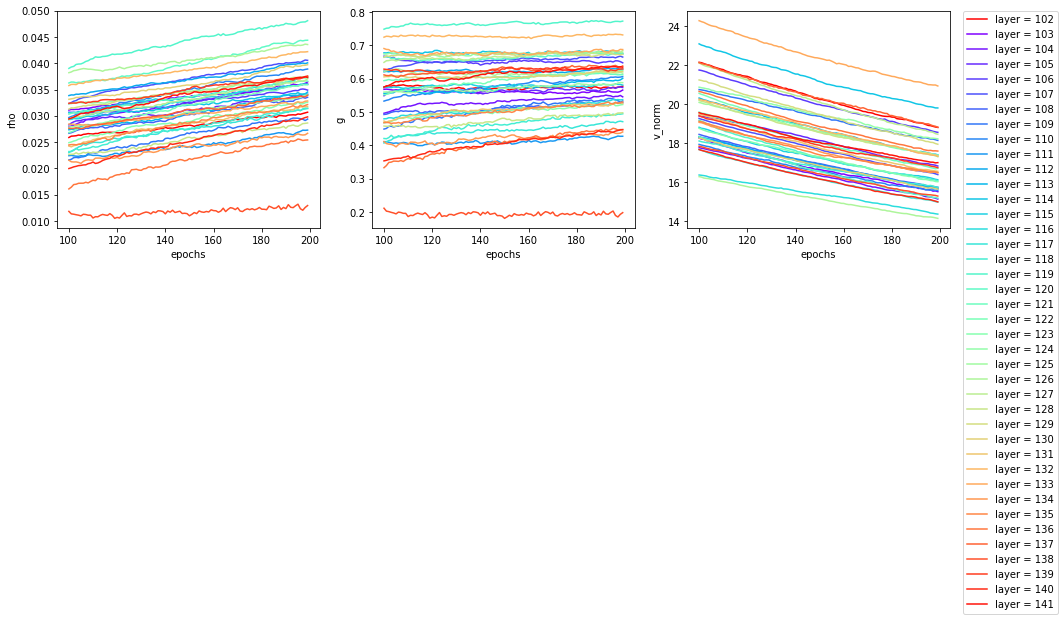

In [24]:
plot2d(filename[1],layers_start = 120+22-40,layers_end =120+22,total_layers =40)

### 4.3.3      Learning rate = 0.001

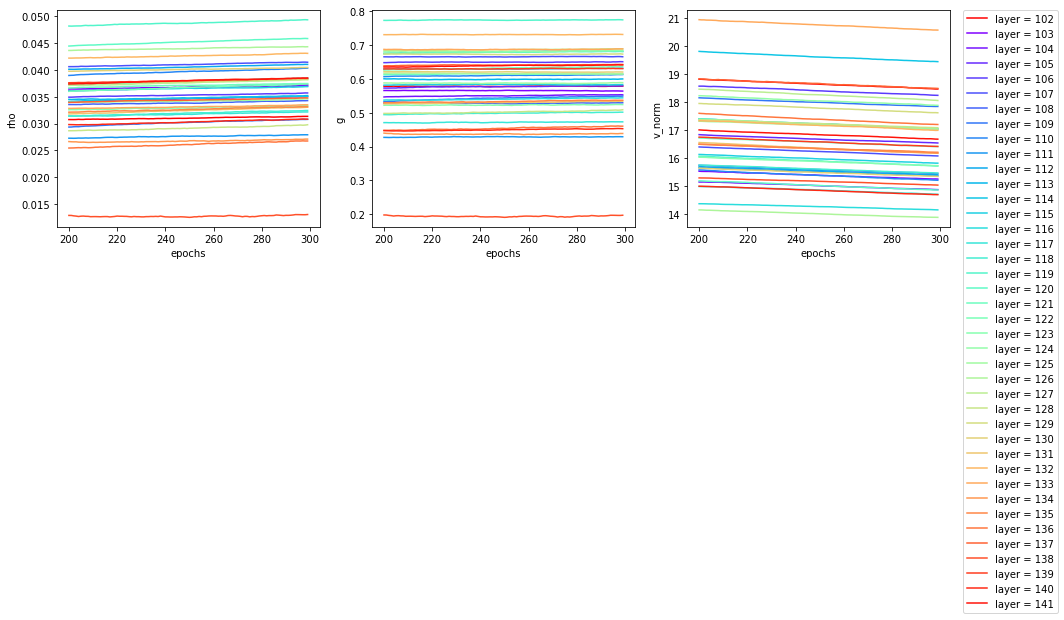

In [25]:
plot2d(filename[2],layers_start = 120+22-40,layers_end =120+22,total_layers =40)

## 4.4 Second FC Layer (84 neurons: Number 142 - 225)

Similar to First FC layer

### 4.4.1     Learning rate = 0.1

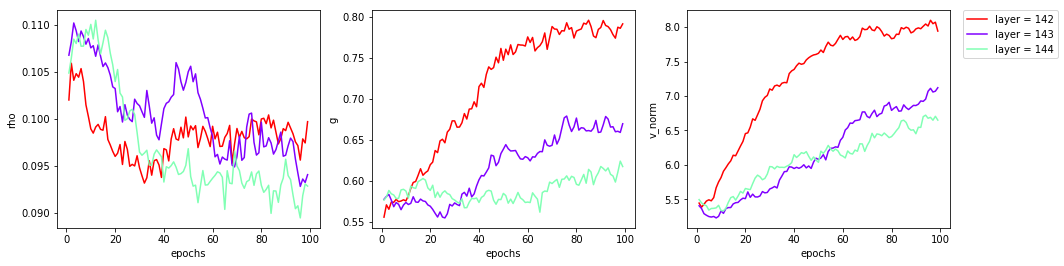

In [26]:
plot2d(filename[0],layers_start = 120+22,layers_end =120+22+3,total_layers =3)

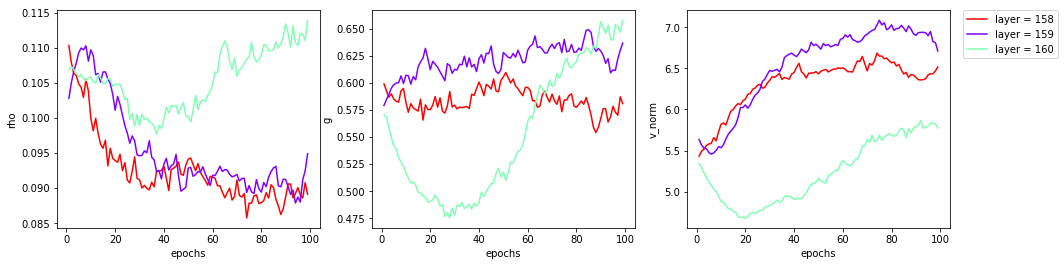

In [27]:
plot2d(filename[0],layers_start = 120+22+16,layers_end =120+22+19,total_layers =3)

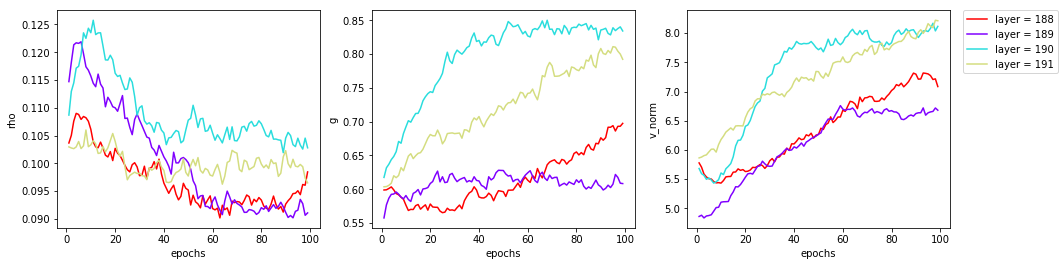

In [28]:
plot2d(filename[0],layers_start = 120+22+46,layers_end =120+22+50,total_layers =4)

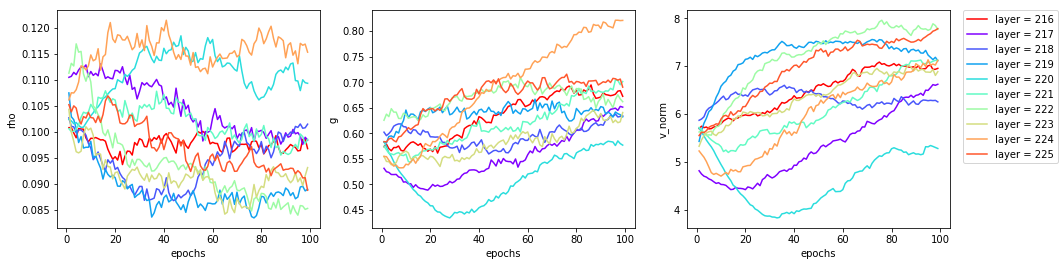

In [29]:
plot2d(filename[0],layers_start = 120+22+74,layers_end =120+22+84,total_layers =10)

### 4.4.2      Learning rate = 0.01

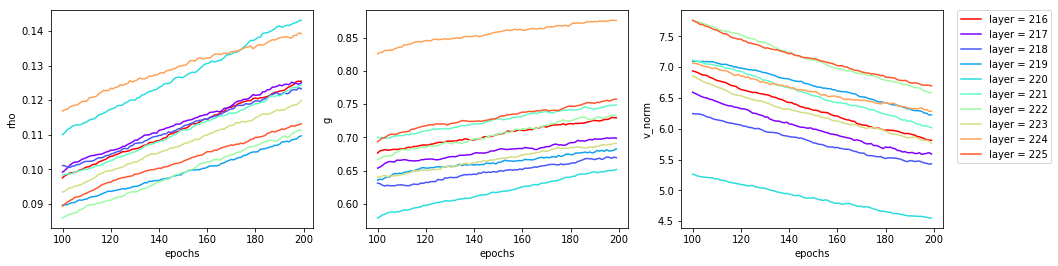

In [30]:
plot2d(filename[1],layers_start = 120+22+74,layers_end =120+22+84,total_layers =10)

### 4.4.1     Learning rate = 0.001

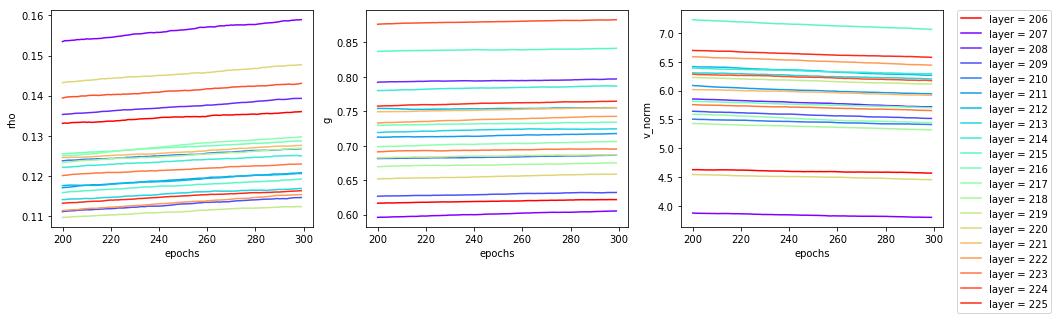

In [31]:
plot2d(filename[2],layers_start = 120+22+64,layers_end =120+22+84,total_layers =20)